
## Czyszczenie danych 


Na początek zajmiemy się czyszczeniem danych czy też wstępnym przetwarzaniem danych, które może polegać na 

W ogólności chcielibyśmy odpowiedzieć na następujące pytania 

- czy wszystko w naszych danych nie ma żadnych anomalii, które są niezgodne z naszą wiedzą o domenie
- czy należy w jakiś sposób przetworzyć dane do innego formatu/postaci, które nadawać się będzie lepiej do dalszego przetwarzania 
- czy są jakieś błędy wynikające z procesu pomiaru lub akwizycji

Zaczniemy od tego że załadujemy nasz zbiór danych z pliku CSV (czyli [Comma Separeted File](https://pl.wikipedia.org/wiki/CSV_(format_pliku))

In [1]:
import pandas as pd

df_iris = pd.read_csv('data/iris-data.csv')
df_iris.head() #wyswielimy pięc pierwszch wierszy

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Na pierwszy rzut oka wszystko wydaje się być w porządku. Niemniej jednak pierwsze co powiniśmy sprawdzić to to czy w pliku nie ma braków danych. Najęczęsciej się je określa w plikacj z danymi za pomocą ciągu znaków NA, które zostaną podczas ładowania zamienione przez bibliotekę pandas na wartości null. Sprawdzmy czy mamy takie dane w pliku?

In [2]:
#zwrocimy najpier DataFrame takiego samego kszatłtu
#a potem zobaczmy czy istnieje jaka kolwiek wartość isnull()==True
df_iris.isnull().values.any()

True

Wygląda na to, że jest tak w tym przypadku. 

In [3]:
print "wczytaliśmy tyle wierszy:", df_iris.shape[0]

df_iris = df_iris.dropna()

print "zostało nam tyle wierszy:", df_iris.shape[0]

wczytaliśmy tyle wierszy: 150
zostało nam tyle wierszy: 145


In [4]:
#wypiszmy podstawowe statystyki o danych
df_iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,145.000000,145.000000,145.000000,145.000000
mean,5.670303,3.046207,3.836552,1.236552
std,1.326540,0.435096,1.742955,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Dzieki tego typu tabelkom możemy sprawdzić podstawowe informacje o danych oraz czy przykładowo nasze dane wpadają nie przekraczają jakiś rozsąnych przedziałów dla poszczególnych cech, co z kolei możemy wiedzieć z używająć wiedzy domenowej.

Tego typu statystyki w formie tekstowej są jednak rzadko używane w praktyce. Wykonajmy najprostszą wizualizację, tj zastosujmy wykres parowy. Do tego zaimportujemy podstawowy moduł do wykonywania wizualizacji matplotlib i rozbudowujący go moduł seaborn. Następnie stworzymy wykres punktowy dla każdej pary zmiennych.


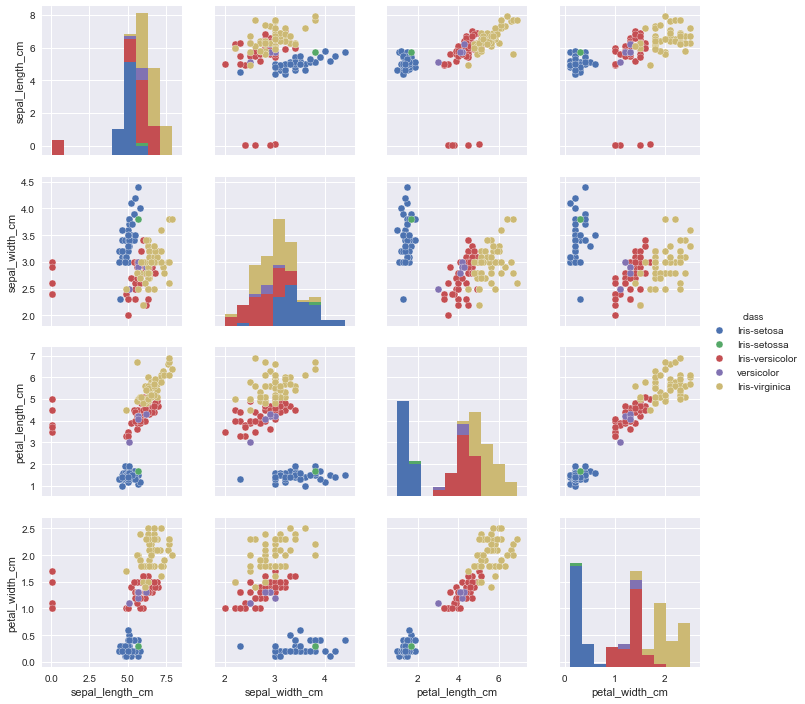

In [5]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.pairplot(df_iris, hue='class')
plt.show()

Z tego wykresu możemy wysnuć od razu następujące wnioski:

1. Domeana klasy ma 5 unikalnych wartości, podczas gdy powinna mieć ich 3,
2. Gatunek Versicolor (kolor czerwony) posiada bardzo dobrze widoczne wartości odstające dla cechy sepal_length_cm,
3. W danych były wartości nieokreślone które tymczasowo usunęliśmy.

In [6]:
#wypiszmy jakie posiaday unikalne wartośći w kolumnie class
print df_iris['class'].unique()

['Iris-setosa' 'Iris-setossa' 'Iris-versicolor' 'versicolor'
 'Iris-virginica']


Możemy zauważyć, że musiał nastąpić błąd w kodowaniu danych, podczas wprowadzania danych zostały wykonane dwie literówki. Możemy bardzo łatwo zauważyć które to były oraz poprawić.

In [7]:

df_iris.loc[df_iris['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
df_iris.loc[df_iris['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

print df_iris['class'].unique()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Widzimy, że w danych są wartości odstające, które mogą być błędne, dla cechy sepal_length_cm. Przypadki odstające tj. takie które znajdują się poza zakresem w które wpada większość danych, nie muszą jednoznacznie być błędne. Niemniej jednak należy im się dobrze przyjrzeć. I bardzo rzadko możemy jednoznacznie stwierdzić, czy taka wartość odstające była błeðem pomiaru, błędem na poziomie akwizycji czy też wprowadzania danych, czy może faktycznie jest odstępstwem od normy w samym fenomenie, który obserwujemy. 

W tym przypadku dla kwiata iris-versicolor mamy wartość poniżej 2,5 cm. Przyjrzyjmy się danym w tym przypadku. Zastosujemy 

In [11]:
#dla ułatwienia najpier zapiszę sobie indeks do wykrajania dla tych danych
broken_slice_idx = (df_iris['class'] == 'Iris-versicolor') & (df_iris['sepal_length_cm'] < 1.0)

df_iris.loc[broken_slice_idx]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


Możemy wrócić, do tabeli ze statysykami i zauważyć, że wartość sepal_length_cm wynosiła średnio 5.6 + 1.3. Wygląda na to że podczas wprowadzania danych dla tych został dokonany błąd jednostek, dane zostały wprowadzone w mm zamiast w cm. Oczywiście to należałoby w jakiś sposób potwierdzić, ale na ten moment zmieśmy jednostki dla tych danych.

In [13]:
df_iris.loc[broken_slice_idx, 'sepal_length_cm'] *= 100.0

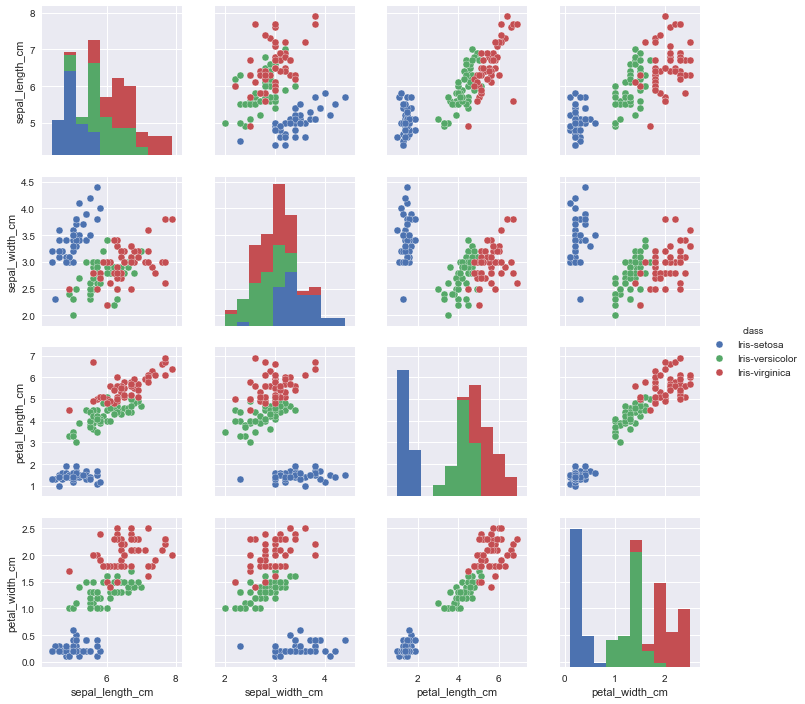

In [14]:
sb.pairplot(df_iris, hue='class')
plt.show()